<a href="https://colab.research.google.com/github/camilacruz-cs/curso-eba/blob/main/Estatistica_Descritiva/Desafio/%20Desafio_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio 1 - Ifood

O objetivo do desafio é realizar uma **análise exploratória de dados**.

*Perguntas à serem respondidas:*

- Quantos dados temos? Linhas e colunas
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

**Vamos agora entender o perfil de clientes que temos**

- Qual é o maior salário encontrado na nossa base? Veja na coluna Income
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
- Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
- Quantos clientes temos em cada estado civil? Veja na coluna marital_status

**Agora vamos ver como os dados se correlacionam**

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
- Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

**Vá além!**

1. O que você faria com as informações que tirou das perguntas acima?
2. Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.

### Montando o drive

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/E.B.A - Estatística do Básico ao Avançado/Semana 1 - Estatística Descritiva/Desafio - Ifood

/content/drive/MyDrive/Colab Notebooks/E.B.A - Estatística do Básico ao Avançado/Semana 1 - Estatística Descritiva/Desafio - Ifood


In [3]:
import os
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/E.B.A - Estatística do Básico ao Avançado/Semana 1 - Estatística Descritiva/Desafio - Ifood


In [4]:
!ls

'Desafio - Ifood.ipynb'   mkt_data.csv


## Etapa 1. Origem dos Dados

**O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:**

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

### Dicionário de dados (algumas colunas da base de dados)

| Feature              | Description |
|----------------------|-------------|
| AcceptedCmp1        | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2        | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3        | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4        | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5        | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response (target)   | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain            | 1 if customer complained in the last 2 years |
| DtCustomer          | Date of customer's enrollment with the company |
| Education           | Customer's level of education |
| Marital             | Customer's marital status |
| Kidhome             | Number of small children in customer’s household |
| Teenhome            | Number of teenagers in customer’s household |
| Income              | Customer’s yearly household income |
| MntFishProducts     | Amount spent on fish products in the last 2 years |
| MntMeatProducts     | Amount spent on meat products in the last 2 years |
| MntFruits          | Amount spent on fruits in the last 2 years |
| MntSweetProducts    | Amount spent on sweet products in the last 2 years |
| MntWines           | Amount spent on wines in the last 2 years |
| MntGoldProducts     | Amount spent on gold products in the last 2 years |
| NumDealsPurchases   | Number of purchases made with discount |
| NumCatalogPurchases | Number of purchases made using catalogue |
| NumStorePurchases   | Number of purchases made directly in stores |
| NumWebPurchases     | Number of purchases made through company’s website |
| NumWebVisitsMonth   | Number of visits to company’s website in the last month |
| Recency            | Number of days since the last purchase |

#Tabela com a tradução das colunas:  

| **Nome Original**            | **Tradução**                                          |
|------------------------------|------------------------------------------------------|
| Unnamed: 0                   | Índice                                              |
| Income                       | Renda                                               |
| Kidhome                      | Número de crianças em casa                         |
| Teenhome                     | Número de adolescentes em casa                     |
| Recency                      | Dias desde a última compra                         |
| MntWines                     | Gasto com vinhos                                   |
| MntFruits                    | Gasto com frutas                                   |
| MntMeatProducts              | Gasto com produtos de carne                       |
| MntFishProducts              | Gasto com produtos de peixe                       |
| MntSweetProducts             | Gasto com doces                                   |
| MntGoldProds                 | Gasto com produtos de ouro                        |
| NumDealsPurchases            | Compras feitas com desconto                       |
| NumWebPurchases              | Compras feitas pela internet                      |
| NumCatalogPurchases          | Compras feitas via catálogo                       |
| NumStorePurchases            | Compras feitas na loja física                     |
| NumWebVisitsMonth            | Número de visitas ao site por mês                 |
| AcceptedCmp3                 | Aceitou a campanha de marketing 3                 |
| AcceptedCmp4                 | Aceitou a campanha de marketing 4                 |
| AcceptedCmp5                 | Aceitou a campanha de marketing 5                 |
| AcceptedCmp1                 | Aceitou a campanha de marketing 1                 |
| AcceptedCmp2                 | Aceitou a campanha de marketing 2                 |
| Complain                     | Fez uma reclamação                                |
| Z_CostContact                | Custo fixo de contato (variável técnica)          |
| Z_Revenue                    | Receita fixa (variável técnica)                   |
| Response                     | Respondeu à última campanha de marketing          |
| Age                          | Idade                                              |
| Customer_Days                | Dias como cliente                                 |
| marital_Divorced             | Estado civil: Divorciado(a)                       |
| marital_Married              | Estado civil: Casado(a)                           |
| marital_Single               | Estado civil: Solteiro(a)                         |
| marital_Together             | Estado civil: União estável                       |
| marital_Widow                | Estado civil: Viúvo(a)                            |
| education_2n Cycle           | Educação: 2º ciclo (ensino médio)                 |
| education_Basic              | Educação: Básica (ensino fundamental)             |
| education_Graduation         | Educação: Graduação (ensino superior)             |
| education_Master             | Educação: Mestrado                                |
| education_PhD                | Educação: Doutorado                               |
| MntTotal                     | Gasto total                                       |
| MntRegularProds              | Gasto com produtos regulares                     |
| AcceptedCmpOverall           | Número total de campanhas aceitas                |
| marital_status               | Estado civil (variável consolidada)              |
| education_level              | Nível de educação (variável consolidada)         |
| kids                         | Número total de filhos (crianças + adolescentes) |
| expenses                     | Gastos                                            |

In [5]:
import pandas as pd

In [96]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E.B.A - Estatística do Básico ao Avançado/Semana 1 - Estatística Descritiva/Desafio - Ifood/mkt_data.csv')
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [63]:
df.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids',
       'expenses'],
      dtype='object')

## Análise dos Dados


In [8]:
#Quantos dados temos? Linhas e colunas

df.shape

(2205, 44)

In [9]:
#Quais são as colunas numéricas?

df.dtypes

,0
Unnamed: 0,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64


In [16]:
#Temos duplicados na nossa base? Se tivermos, retire-os

#Validação se há ou não duplicatas.
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2200,False
2201,False
2202,False
2203,False


In [65]:
#O número de colunas e linhas permaneceu o mesmo, pois não havia nenhuma duplicidade para ser excluída.

df.drop_duplicates()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [18]:
#Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?

df.isnull().sum()
#NaN, null, missing

,0
Unnamed: 0,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


Será que eles indicam algo? **O que fazer com eles**?

- São variáveis categoricas nominais. Classificam o perfil dos clientes da base. O ideal é não retira-las.

In [ ]:
#Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,NaN,NaN,3.0,NaN,NaN,1529,1441,0,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,NaN,NaN,3.0,NaN,NaN,21,15,0,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,NaN,NaN,3.0,NaN,NaN,734,692,0,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,NaN,NaN,3.0,NaN,NaN,48,43,0,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,NaN,NaN,5.0,407,392,0,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,NaN,NaN,3.0,NaN,NaN,1094,847,0,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,NaN,NaN,5.0,436,428,1,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,NaN,NaN,3.0,NaN,NaN,1217,1193,1,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,NaN,NaN,4.0,NaN,782,721,0,1,782


In [29]:
df_numeric.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


## Análise exploratória dos dados
- Entendendo o perfil de clientes

In [35]:
#Qual é o maior salário encontrado na nossa base? Veja na coluna Income

df.Income.max()

113734.0

In [ ]:
#Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income

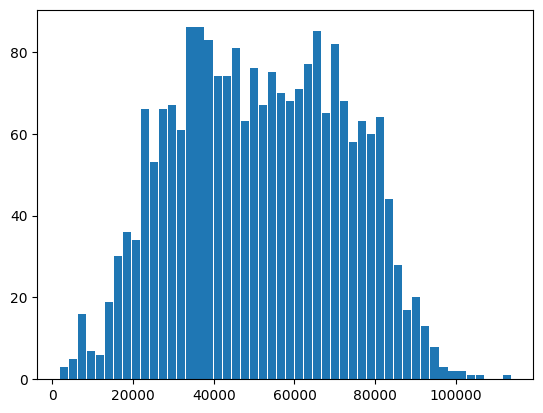

In [39]:
import matplotlib.pyplot as plt

plt.hist(df['Income'], 50, rwidth=0.9)
plt.show()

In [44]:
#Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level

df.education_level.value_counts()

#Graduation (Graduação)
#PhD (Doutorado)
#Master (Mestrado)
#2nd Cycle (2º Ciclo - Mestrado)
#Basic (Básico - Ensino Fundamental)

,count
education_level,
Graduation,1113
PhD,476
Master,364
2n Cycle,198
Basic,54


<Axes: xlabel='education_level', ylabel='count'>

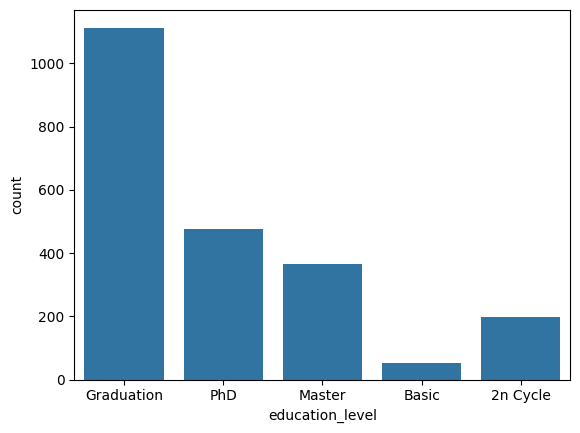

In [109]:
sns.countplot(x=df["education_level"])

In [45]:
#Quantos clientes temos em cada estado civil? Veja na coluna marital_status

df.marital_status.value_counts()

,count
marital_status,
Married,854
Together,568
Single,477
Divorced,230
Widow,76


<Axes: xlabel='marital_status', ylabel='count'>

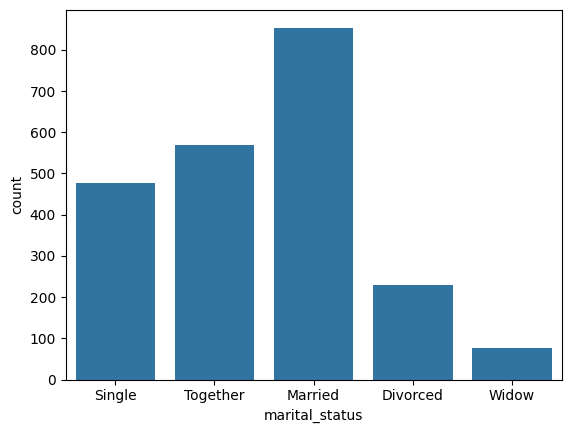

In [110]:
sns.countplot(x=df["marital_status"])

- Como os dados se correlacionam?

In [46]:
import seaborn as sns

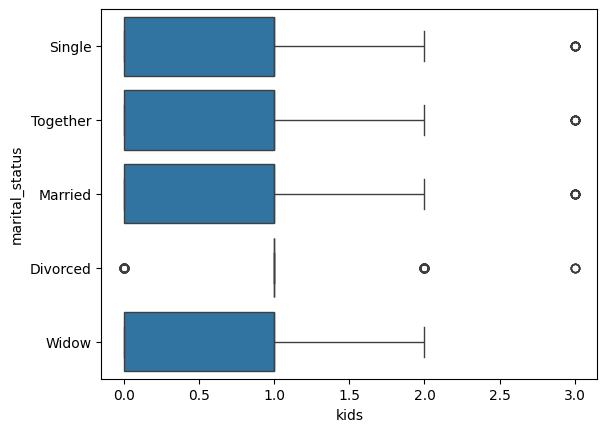

In [56]:
#Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids

fig = sns.boxplot(x="kids", y="marital_status", data=df)


<Axes: xlabel='kids', ylabel='expenses'>

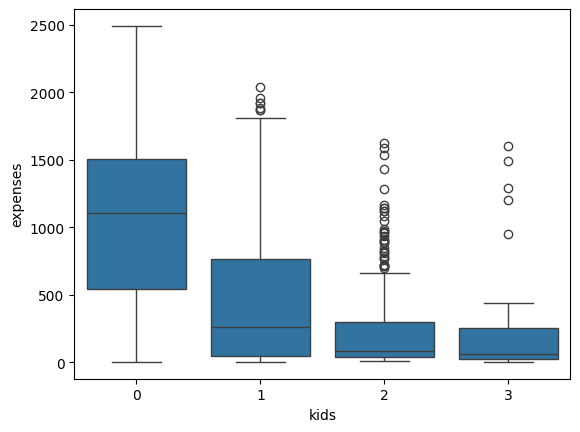

In [111]:
#As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids


sns.boxplot(x='kids', y='expenses', data=df)

In [60]:
df.groupby("kids")["expenses"].agg(["mean", "median"])

,mean,median
kids,,
0,1041.207006,1106.5
1,434.530576,264.0
2,221.568675,84.0
3,237.380000,62.0


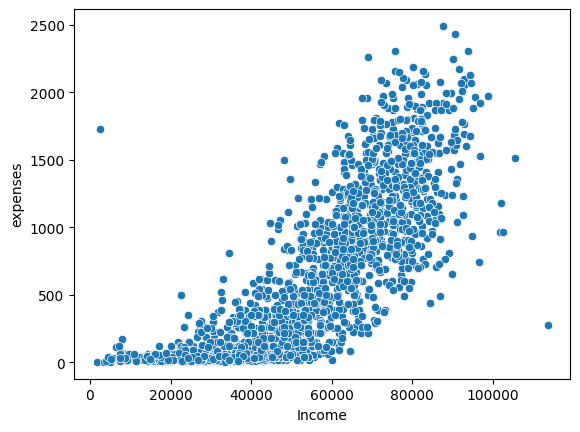

In [61]:
#Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

fig = sns.scatterplot(x="Income", y="expenses", data=df)

- Vá além!

1. O que você faria com as informações que tirou das perguntas acima?
2. Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.

O que você faria com as informações que tirou das perguntas acima?

R: Buscaria em outras colunas informações mais precisas, uma vez que:


1. A distribuição salarial dos consumidos é entre 40.00 até 80.000.

2. Não existe grande correlação entre "ter filhos" e "gastar mais".

3. Casais sem filhos consomem mais do que casais que possuem de 1 à 3 filhos.

4. Em sua grande maioria, quanto maior o salário maior está concentração de gastos.

E ainda sim, pouco conclusivo.

### Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la

## **Hipóteses**

1. Em relação à ESTADO CIVIL.

 - Qual estado civil gasta mais?

3. Em relação à IDADE.

 - Idade interfere/tem relação ao **gasto total**?

4. Em relação à FILHOS.

 - Quando se tem filhos crianças se gasta **mais** ou **menos** na plataforma? E para adolescentes?

 - Em uma análise foi possível perceber, que pessoas **sem filhos** gastam mais na plataforma. Em que elas gastam?

 - Casais que possuem mais de **um filho** utilizam mais descontos na plataforma?


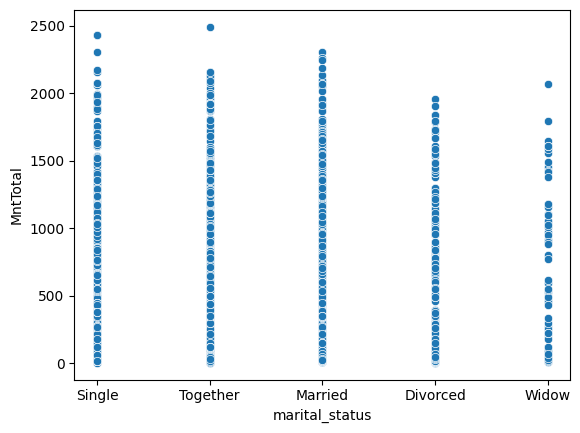

In [108]:
#Qual estado civil gasta mais?

fig = sns.scatterplot(x="marital_status", y="MntTotal", data=df)


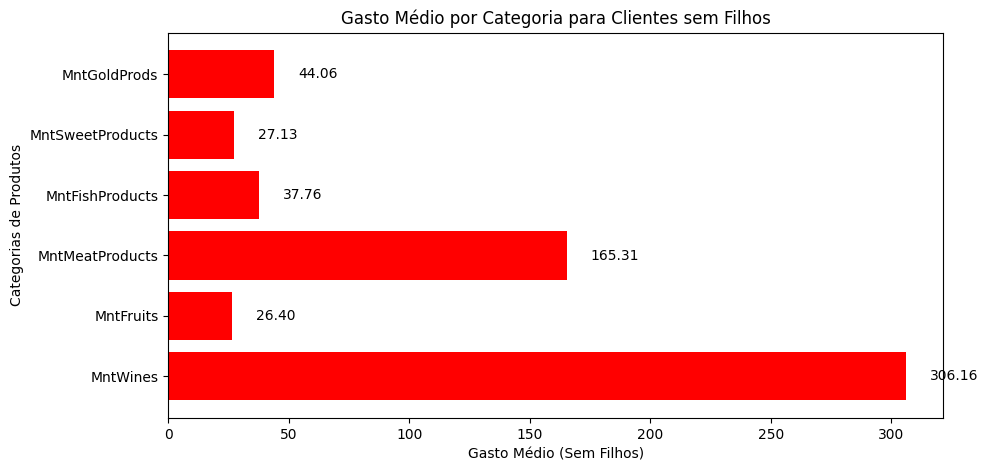

In [76]:
##Em uma análise foi possível perceber, que pessoas sem filhos gastam mais na plataforma. Em que elas gastam?

# Lista com os nomes das colunas de produtos
produtos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Filtrando apenas os clientes sem filhos
sem_filhos = df[df['kids'] == 0]

# Calculando o gasto médio em cada categoria de produto
gastos_medios = sem_filhos[produtos].mean()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))
bars = plt.barh(produtos, gastos_medios, color='red')

# Adicionando os valores em cada barra
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

# Configurações do gráfico
plt.xlabel('Gasto Médio (Sem Filhos)')
plt.ylabel('Categorias de Produtos')
plt.title('Gasto Médio por Categoria para Clientes sem Filhos')
#plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


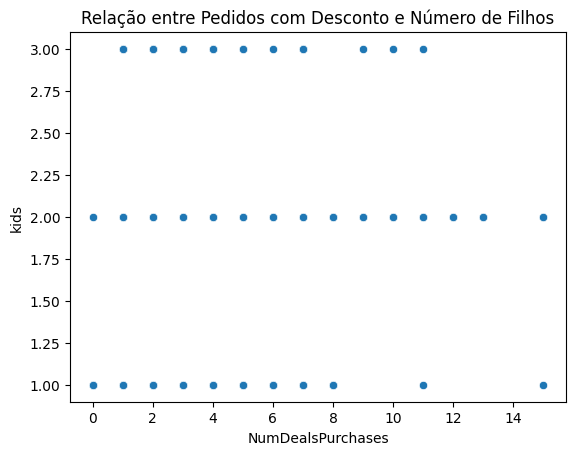

In [100]:
#Casais que possuem mais de um filho utilizam mais descontos na plataforma?

# Filtrando apenas os clientes com filhos
com_filhos = df[df['kids'] != 0]


fig = sns.scatterplot(x="NumDealsPurchases", y="kids", data=com_filhos)

# Adicionando título
plt.title("Relação entre Pedidos com Desconto e Número de Filhos")

# Exibindo o gráfico
plt.show()

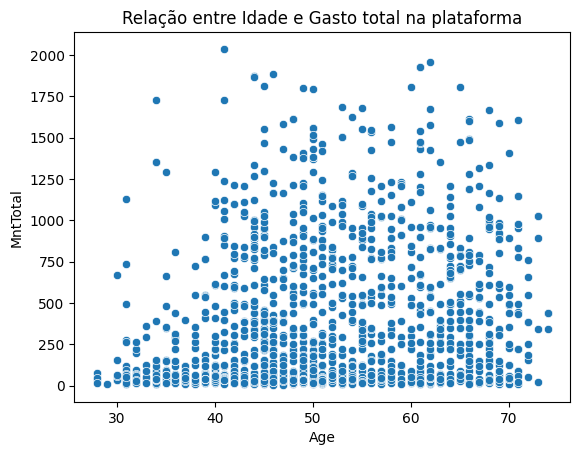

In [101]:
#Idade interfere/tem relação ao gasto total?

fig = sns.scatterplot(x="Age", y="MntTotal", data=com_filhos)

# Adicionando título
plt.title("Relação entre Idade e Gasto total na plataforma")

# Exibindo o gráfico
plt.show()

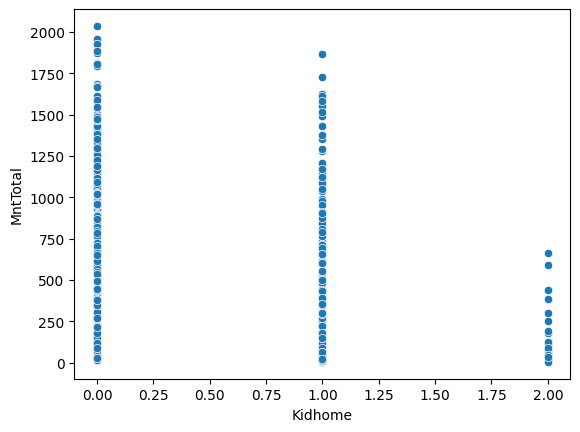

In [102]:
#Quando se tem filhos crianças se gasta mais ou menos na plataforma? E para adolescentes?

fig = sns.scatterplot(x="Kidhome", y="MntTotal", data=com_filhos)


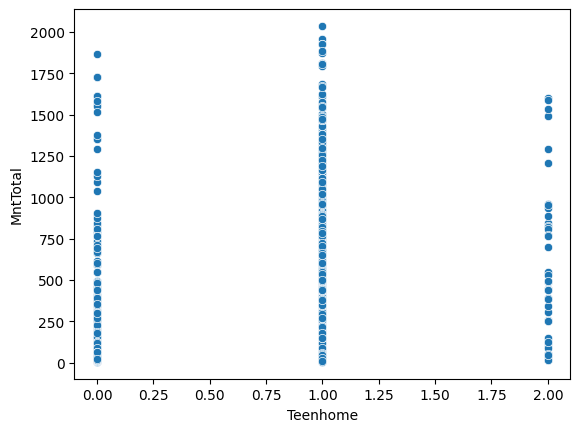

In [103]:
fig = sns.scatterplot(x="Teenhome", y="MntTotal", data=com_filhos)

#Conclusão
### Respostas às Perguntas Principais:

1. **Em quais categorias de produtos pessoas sem filhos gastam mais e casais com mais de um filho utilizam mais descontos?**

- Casais sem filhos gastam mais com a compra de vinhos na plataforma. Seguido de: carnes.
- A análise ficou pouco conclusiva, uma vez que independente da quantidade de filhos observada (1 a 3) o consumo na plataforma, utilizando cupons de desconto, segue muito parecido.

2. Idade interfere/tem relação ao gasto total?

- Não. Tanto pessoas mais jovens quanto pessoas mais velhas possuem uma relação com gasto total na plataforma muito parecido.


3. Quando se tem filhos crianças se gasta mais ou menos na plataforma? E para adolescentes?

- Pais, quem possuem até 1 filho, apresentou uma atividade maior em compras na análise. Pais com até 2 filhos não apresentaram o mesmo resultado.

- Já pais de até 1 adolescente, gastam mais em compras na plataforma.

4. Qual estado civil gasta mais?

- Pessoas solteiras gastam tanto quanto pessoas casadas na plataforma.

